In [19]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import SCORERS
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor, DummyClassifier

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are 10 featues which are of type "object" which need to be converted from label to numerical

In [22]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [23]:
print(cat_features,'\n')
print('There are ',len(cat_features), 'featues including target which are of type "object" which need to be converted from label to numerical')


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] 

There are  11 featues including target which are of type "object" which need to be converted from label to numerical



# converting categorical features

In [24]:
class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features,drop_first=True)

In [25]:
data = df

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Checking for nan values using heatmap

<AxesSubplot:>

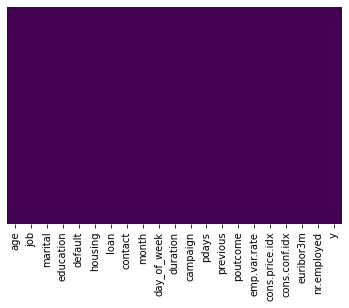

In [28]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


# Dropping feature "Duration"

In [29]:
data = data.drop(['duration'],axis=1)

# Checking for the imbalance in dataste

In [30]:
data.shape

(41188, 20)

In [31]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='Count'>

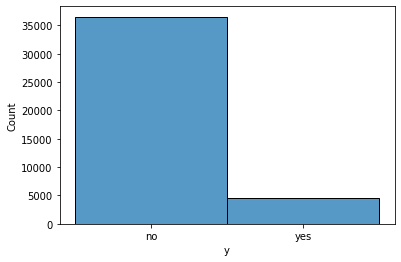

In [32]:
sns.histplot(data['y'])

The dataset is highly imbalanced with a lot of 0 values


# Analysing Numerical features

In [33]:
# list of numerical variables
num_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(num_features))

# visualise the numerical variables
data[num_features].head()

Number of numerical variables:  9


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


# Modelling

In [34]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=50, stratify= data['y'] )  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(train_set), len(test_set))

32950 8238


In [133]:
df = train_set.copy()
# Separate features from outcomes
y_df = df['y'].copy()
y_df = pd.get_dummies(y_df, columns=['y'],drop_first=True)
y = y_df.rename(columns={'yes': 'y'})
X_df = df.copy().drop(['y'],axis = 1)

In [134]:
y

,y
38445,1
17713,0
30309,1
25951,0
29064,0
...,...
11470,0
18260,1
141,0
19789,0


In [37]:
num_features = [feature for feature in X_df.columns if X_df[feature].dtypes != 'O']

In [38]:
cat_features = [feature for feature in X_df.columns if X_df[feature].dtype == 'O']

In [39]:
num_features

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [40]:
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [41]:
encoder = OneHotEncoderCategoricalFeatures(cat_features)
X_oho = encoder.transform(X_df)
X_oho.shape

(32950, 52)

In [42]:
X_oho

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
38445,22,3,6,1,-3.4,92.431,-26.9,0.730,5017.5,0,...,0,0,1,0,0,0,0,0,0,1
17713,36,1,999,0,1.4,93.918,-42.7,4.961,5228.1,0,...,0,0,0,0,0,0,1,0,1,0
30309,37,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,0,...,0,0,0,0,0,1,0,0,1,0
25951,38,2,999,0,-0.1,93.200,-42.0,4.120,5195.8,0,...,0,1,0,0,0,0,0,1,1,0
29064,41,3,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11470,37,1,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,0,0,0,1,0
18260,43,4,999,0,1.4,93.918,-42.7,4.963,5228.1,0,...,0,0,0,0,0,0,0,1,1,0
141,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
19789,47,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
colTransformer = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
    )

X_processed = colTransformer.fit_transform(X_df)
X_processed.shape

(32950, 62)

In [44]:
X_processed

array([[-1.72917814,  0.15624845, -5.17551625, ...,  0.        ,
         0.        ,  1.        ],
       [-0.38548747, -0.56704269,  0.19322861, ...,  0.        ,
         1.        ,  0.        ],
       [-0.28950956, -0.56704269,  0.19322861, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.53407064, -0.56704269,  0.19322861, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.67026949, -0.56704269,  0.19322861, ...,  0.        ,
         1.        ,  0.        ],
       [-0.67342118,  1.60283073,  0.19322861, ...,  0.        ,
         1.        ,  0.        ]])

In [45]:
y.values

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [46]:
print(sorted(SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


In [47]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_processed, y)
print("Dummy ACC: %.2f" % f1_score(y, dummy_clf.predict(X_processed)))

Dummy ACC: 0.12


The below code gives the RFC score

In [129]:
clf = RandomForestClassifier(n_estimators=600, max_depth=5, random_state=50)
scores = cross_val_score(clf, X_processed, y, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.28 +/- 0.04


In [116]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1200, num = 24)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]



In [117]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [118]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)



In [119]:
rf_random.fit(X_processed, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................max_depth=5, n_estimators=600; total time=   5.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   5.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   5.4s
[CV] END ......................max_depth=5, n_estimators=600; total time=   5.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   5.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   5.9s
[CV] END ......................max_depth=5, n_estimators=600; total time=   5.7s
[CV] END ......................max_depth=5, n_estimators=600; total time=   5.7s
[CV] END ......................max_depth=5, n_estimators=600; total time=   5.6s
[CV] END ......................max_depth=5, n_estimators=600; total time=   5.7s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   7.2s
[CV] END .....................max_depth=2, n_e

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000, 1050,
                                                         1100, 1150, 1200]},
                   random_state=50, scoring=<function f1_score at 0x12a9b8790>,
                   verbose=2)

In [ ]:
#after gridsearch check. rfc with best estimators

In [130]:
rf_random.best_params_

{'n_estimators': 600, 'max_depth': 5}

In [131]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=600)

In [132]:
clf = rf_random.best_estimator_
scores = cross_val_score(clf, X_processed, y, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.28 +/- 0.04


# FEATURE IMPORTANCE

In [97]:
X = X_processed

[ 7  8  2 61  4  0  6  5  1  3 59 60 52 49 43 50 42 55 31 38 36 56 54 23
 57 22 44 28 58  9 39 10 14 41 18 30 27 48 17 33 21 34 25 53 16 32 13 26
 19 15 51 45 47 12 37 40 11 20 46 24 29 35]
Feature ranking:
1. euribor3m (0.137780)
2. nr.employed (0.116927)
3. pdays (0.074017)
4. success (0.069784)
5. emp.var.rate (0.061363)
6. age (0.060166)
7. cons.conf.idx (0.055543)
8. cons.price.idx (0.048979)
9. campaign (0.026308)
10. previous (0.025351)
11. failure (0.016382)
12. nonexistent (0.014782)
13. oct (0.013438)
14. mar (0.012811)
15. telephone (0.012810)
16. may (0.012357)
17. cellular (0.012290)
18. mon (0.010371)
19. university.degree (0.009047)
20. yes (0.008521)
21. no (0.008431)
22. thu (0.008164)
23. fri (0.007796)
24. single (0.007611)
25. tue (0.007523)
26. married (0.007450)
27. apr (0.007437)
28. high.school (0.007248)
29. wed (0.007054)
30. admin. (0.006952)
31. no (0.006847)
32. blue-collar (0.006600)
33. retired (0.006250)
34. yes (0.006244)
35. technician (0.006190)
36. p

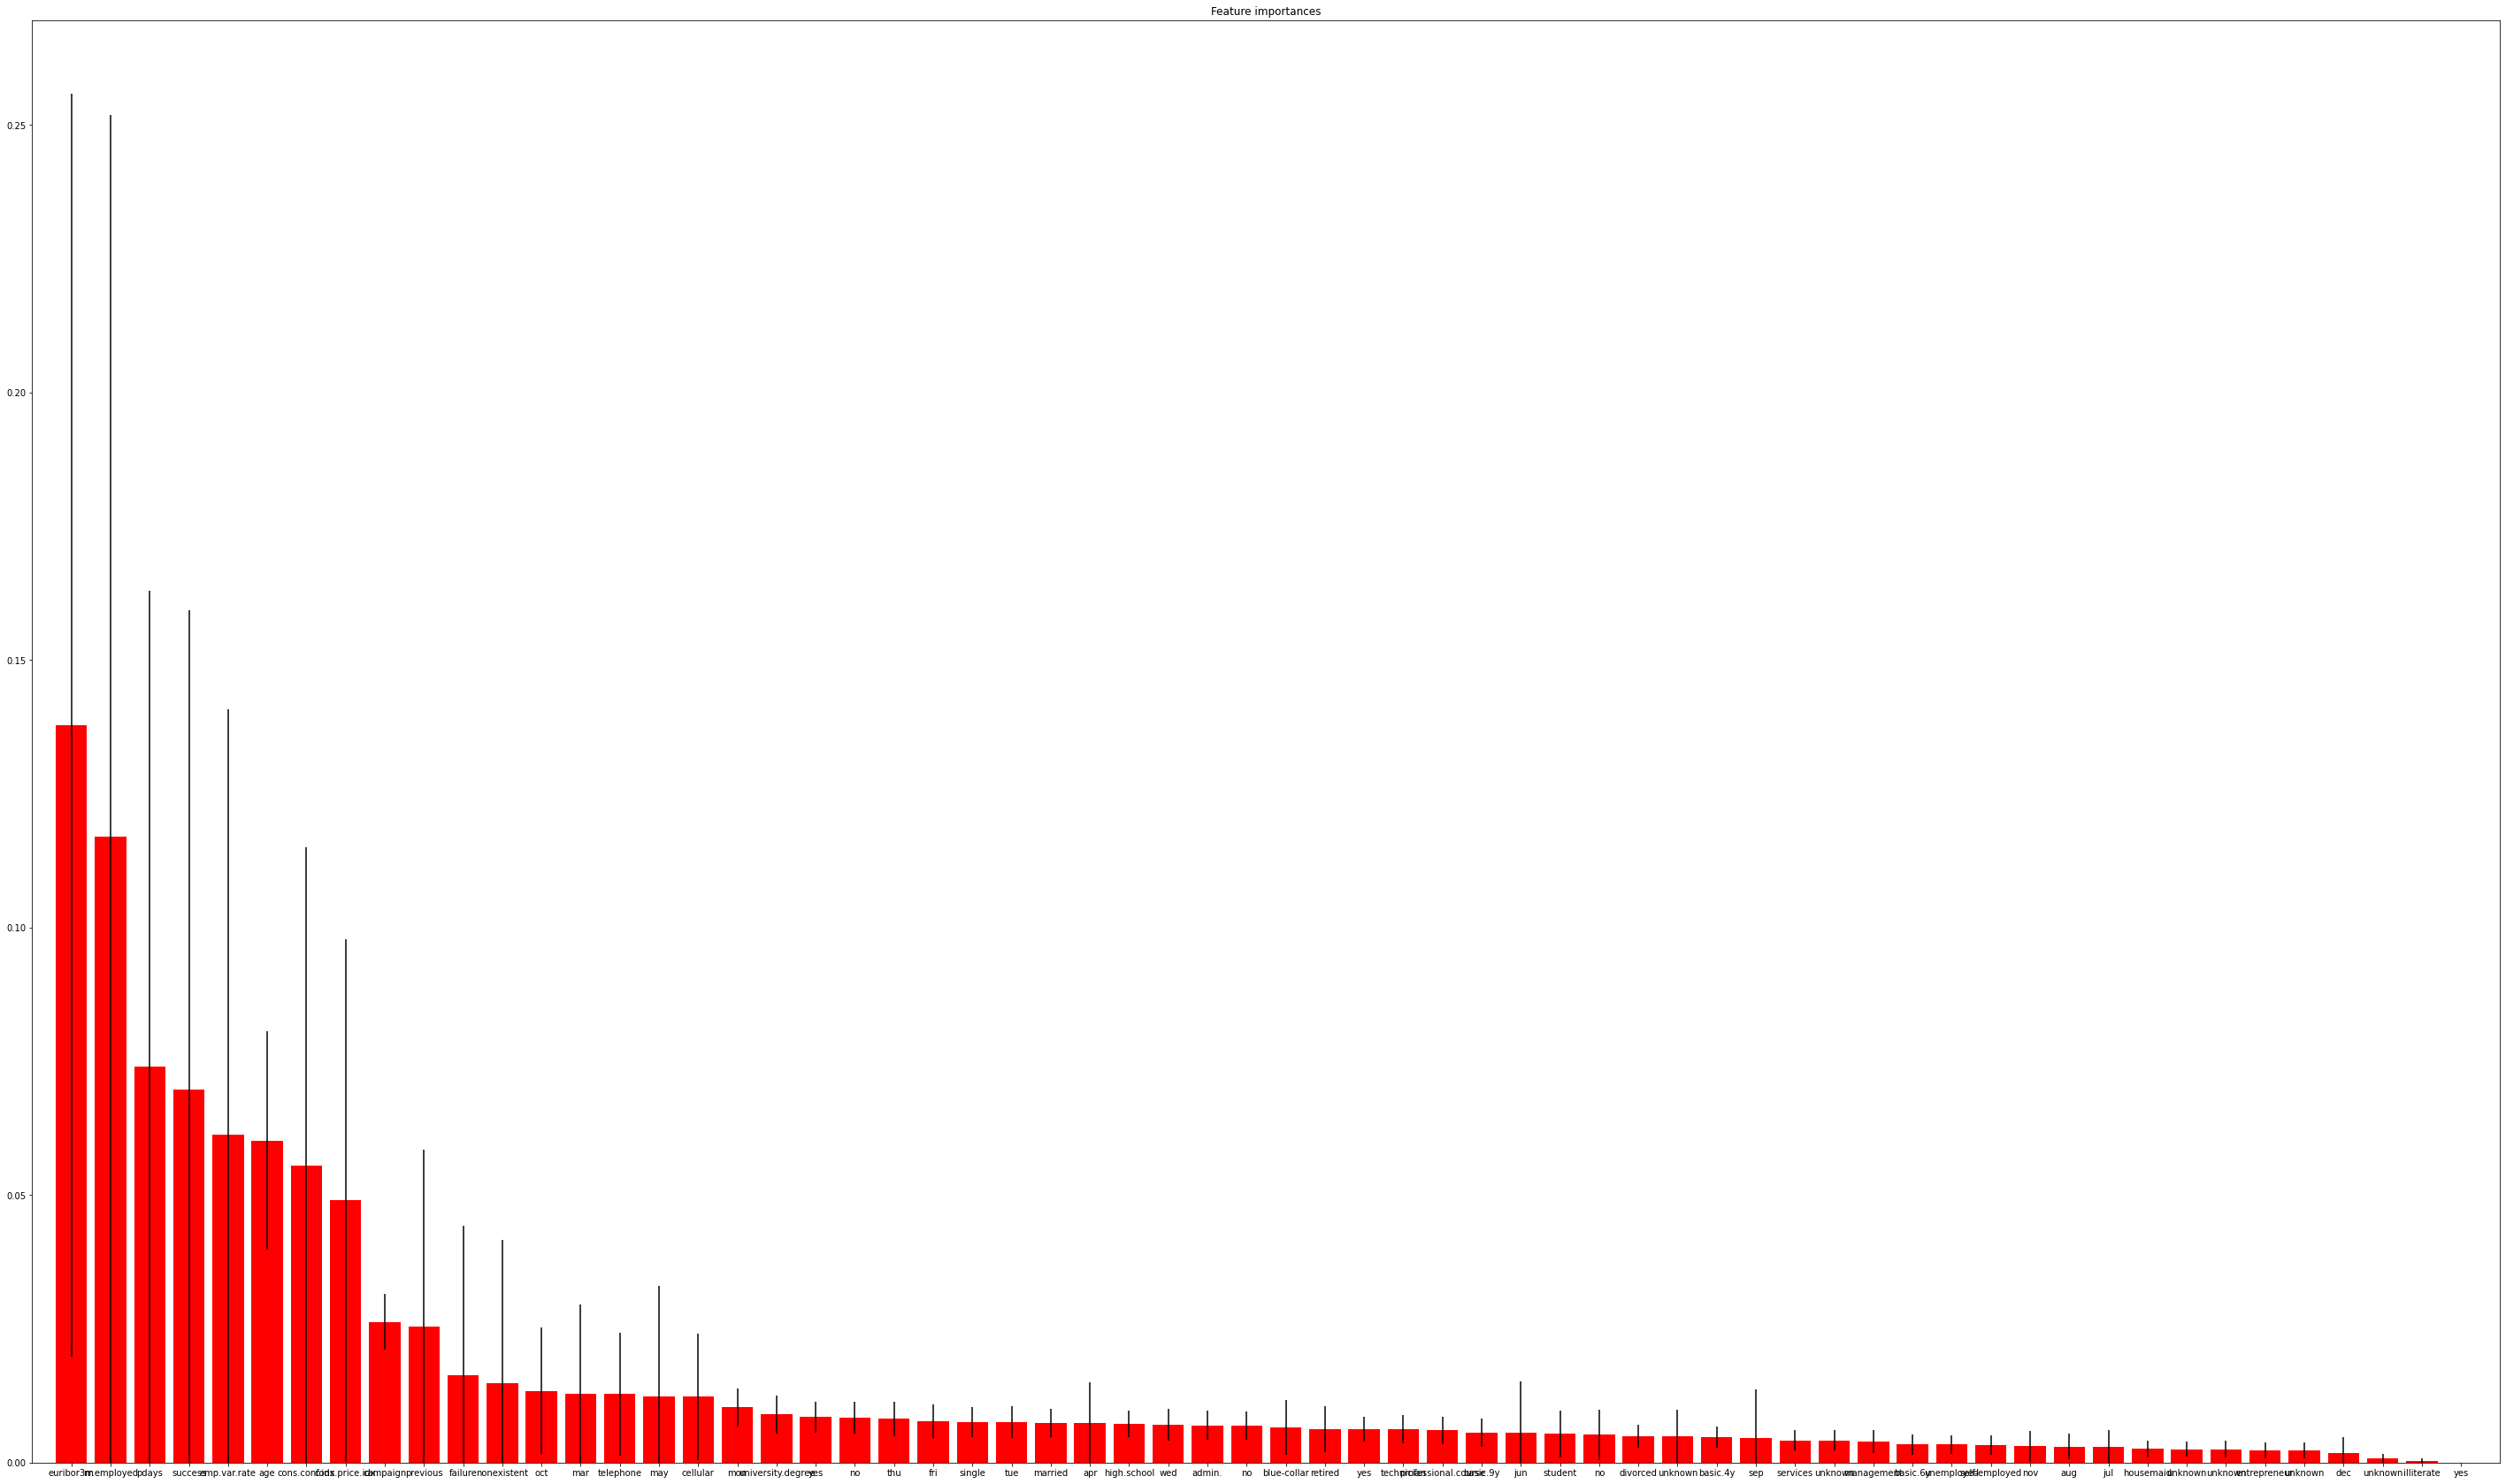

In [105]:
# Fit the model
clf.fit(X_processed, y)

# Let's see the feature importances for our classifier
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Let's get the attibute names:
cat_encoder = colTransformer.named_transformers_['cat']
cat_oho_attributes = oho_categories = [item for sublist in cat_encoder.categories_ for item in sublist]
feat_names = num_features + cat_oho_attributes

# Print the feature ranking
print("Feature ranking:")
for f in range(X_processed.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_names[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feat_names)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(50, 30)

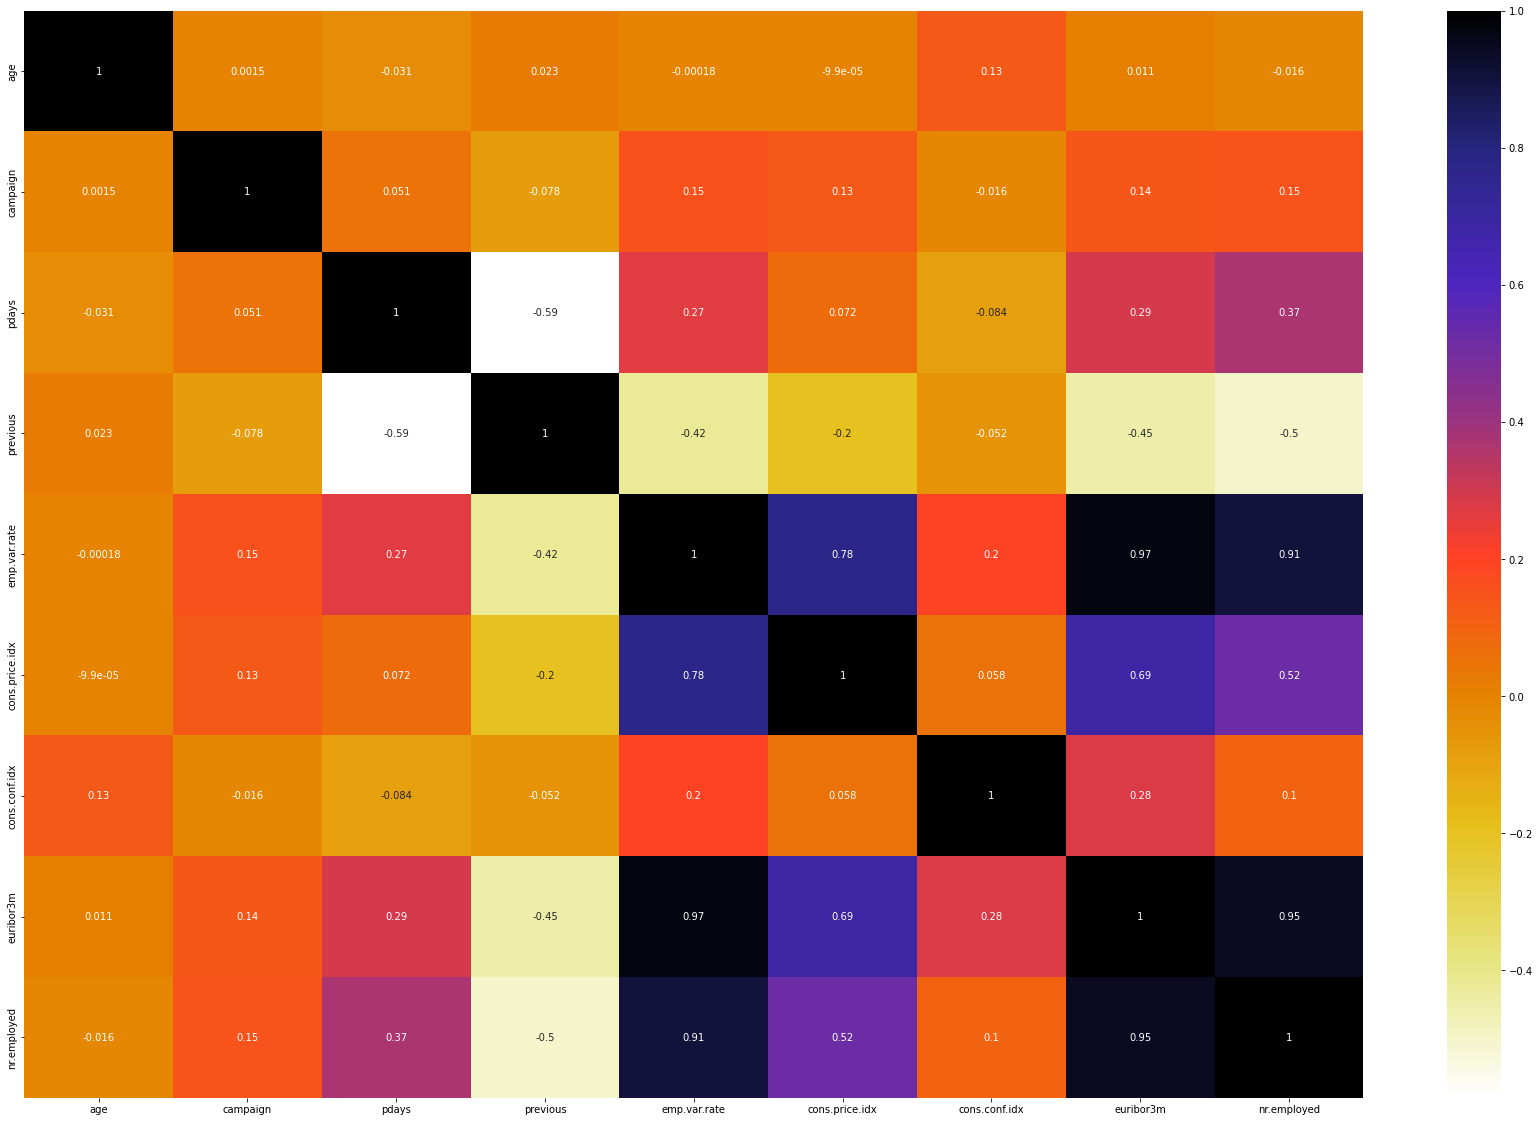

In [137]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,20))
cor = X_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Feature selection

1.euribor3m (0.137780)
2. nr.employed (0.116927)
3. pdays (0.074017)
4. success (0.069784)
5. emp.var.rate (0.061363)
6. age (0.060166)
7. cons.conf.idx (0.055543)
8. cons.price.idx (0.048979)
9. campaign (0.026308)
10. previous 

In [140]:
features =['euribor3m','nr.employed','pdays','poutcome','emp.var.rate','age','cons.conf.idx','cons.price.idx','campaign','previous']

In [147]:
X_df = df[features]

In [148]:
X_df

,euribor3m,nr.employed,pdays,poutcome,emp.var.rate,age,cons.conf.idx,cons.price.idx,campaign,previous
38445,0.730,5017.5,6,success,-3.4,22,-26.9,92.431,3,1
17713,4.961,5228.1,999,nonexistent,1.4,36,-42.7,93.918,1,0
30309,1.365,5099.1,999,nonexistent,-1.8,37,-47.1,93.075,1,0
25951,4.120,5195.8,999,nonexistent,-0.1,38,-42.0,93.200,2,0
29064,1.405,5099.1,999,nonexistent,-1.8,41,-47.1,93.075,3,0
...,...,...,...,...,...,...,...,...,...,...
11470,4.959,5228.1,999,nonexistent,1.4,37,-41.8,94.465,1,0
18260,4.963,5228.1,999,nonexistent,1.4,43,-42.7,93.918,4,0
141,4.857,5191.0,999,nonexistent,1.1,56,-36.4,93.994,1,0
19789,4.966,5228.1,999,nonexistent,1.4,47,-36.1,93.444,1,0


In [150]:
num_features = [feature for feature in X_df.columns if X_df[feature].dtypes != 'O']

In [151]:
cat_features = [feature for feature in X_df.columns if X_df[feature].dtype == 'O']

In [152]:
num_features

['euribor3m',
 'nr.employed',
 'pdays',
 'emp.var.rate',
 'age',
 'cons.conf.idx',
 'cons.price.idx',
 'campaign',
 'previous']

In [153]:
cat_features

['poutcome']

In [154]:
encoder = OneHotEncoderCategoricalFeatures(cat_features)
X_oho = encoder.transform(X_df)
X_oho.shape

(32950, 11)

In [155]:
X_oho

,euribor3m,nr.employed,pdays,emp.var.rate,age,cons.conf.idx,cons.price.idx,campaign,previous,poutcome_nonexistent,poutcome_success
38445,0.730,5017.5,6,-3.4,22,-26.9,92.431,3,1,0,1
17713,4.961,5228.1,999,1.4,36,-42.7,93.918,1,0,1,0
30309,1.365,5099.1,999,-1.8,37,-47.1,93.075,1,0,1,0
25951,4.120,5195.8,999,-0.1,38,-42.0,93.200,2,0,1,0
29064,1.405,5099.1,999,-1.8,41,-47.1,93.075,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11470,4.959,5228.1,999,1.4,37,-41.8,94.465,1,0,1,0
18260,4.963,5228.1,999,1.4,43,-42.7,93.918,4,0,1,0
141,4.857,5191.0,999,1.1,56,-36.4,93.994,1,0,1,0
19789,4.966,5228.1,999,1.4,47,-36.1,93.444,1,0,1,0


In [156]:
colTransformer = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
    )

X_processed = colTransformer.fit_transform(X_df)
X_processed.shape

(32950, 12)

In [160]:
X_processed.shape

(32950, 12)

In [158]:
y.values

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [161]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_processed, y)
print("Dummy ACC: %.2f" % f1_score(y, dummy_clf.predict(X_processed)))

Dummy ACC: 0.11


The below code gives the RFC score

In [163]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=50)
scores = cross_val_score(clf, X_processed, y, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.28 +/- 0.04


In [159]:
clf = rf_random.best_estimator_
scores = cross_val_score(clf, X_processed, y, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.29 +/- 0.05


# TESTING


In [135]:
df_test = test_set.copy()
print('Size of test set: %d' % len(df_test))
# Separate features from outcomes
y_test_df = df_test['y'].copy()
y_test_df = pd.get_dummies(y_test_df, columns=['Class'],drop_first=True)
y_test = y_test_df.rename(columns={'yes': 'y'})
X_test_df = df_test.copy().drop(['y'],axis = 1)

Size of test set: 8238


In [136]:
# Transform features
X_test = colTransformer.transform(X_test_df)
assert X_test.shape[1] == X_processed.shape[1]  # same number of features

In [137]:
# Predict
test_predictions = clf.predict(X_test)
# What's the accuracy on the test set?
acc(y_test, test_predictions)

0.8999757222626851

In [ ]:
colTransformer = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
    )

X_processed = colTransformer.fit_transform(X_df)
X_processed.shape